In [259]:
import altair as alt
import pandas as pd
import requests 
import vega_datasets
from vega_datasets import data
import matplotlib.pyplot as plt
import squarify
import matplotlib as mat
import mplcursors



In [51]:

rqst = requests.get("http://localhost:8000/datos/")

data = rqst.json()

df = pd.DataFrame(data)
df.head(10)

,jurisdiccion_codigo_indec,jurisdiccion_nombre,vacuna_nombre,primera_dosis_cantidad,segunda_dosis_cantidad
0,6,Buenos Aires,AstraZeneca ChAdOx1 S recombinante,3109159,634297
1,6,Buenos Aires,COVISHIELD ChAdOx1nCoV COVID 19,250626,308
2,6,Buenos Aires,Sinopharm Vacuna SARSCOV 2 inactivada,1815657,670877
3,6,Buenos Aires,Sputnik V COVID19 Instituto Gamaleya,3490775,681473
4,2,CABA,AstraZeneca ChAdOx1 S recombinante,627784,139279
5,2,CABA,COVISHIELD ChAdOx1nCoV COVID 19,65350,186
6,2,CABA,Sinopharm Vacuna SARSCOV 2 inactivada,363005,202217
7,2,CABA,Sputnik V COVID19 Instituto Gamaleya,742653,194757
8,10,Catamarca,AstraZeneca ChAdOx1 S recombinante,66825,12056
9,10,Catamarca,COVISHIELD ChAdOx1nCoV COVID 19,4549,1


In [150]:
rqst = requests.get("http://localhost:8000/datos/vacunanombre/alldosis")
data = rqst.json()
df = pd.DataFrame(data)
df

,vacuna_nombre,total_dosis
0,Sputnik V COVID19 Instituto Gamaleya,10827643
1,AstraZeneca ChAdOx1 S recombinante,9480927
2,Sinopharm Vacuna SARSCOV 2 inactivada,6865120
3,COVISHIELD ChAdOx1nCoV COVID 19,651538


In [248]:
rqst = requests.get("http://localhost:8000/datos/vacunanombre/alldosis")
data = rqst.json()
df = pd.DataFrame(data)

alt.Chart(df).mark_bar().encode(
    x=alt.X('total_dosis',title='Dosis Totales'),
    y=alt.Y('vacuna_nombre:N', sort='-x',title='Vacuna'),
    tooltip=[alt.Tooltip('total_dosis', title='Dosis Totales')]
).properties(
    width=1200,
    height=400
).configure_axis(
    labelFontSize=15,
    titleFontSize=15
)




alt.Chart(...)

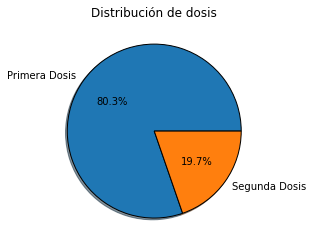

In [177]:
rqst = requests.get("http://localhost:8000/datos/dosis")
data = rqst.json()
df = pd.DataFrame(data)



number = ['Primera Dosis', 'Segunda Dosis']
dosis = df['dosis'].to_list()

plt.pie(dosis, labels=number,
        shadow=True,
        autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})

plt.title("Distribución de dosis")
plt.show()



In [242]:
rqst = requests.get("http://localhost:8000/datos/provincias/alldosisseperated/top6")
data = rqst.json()
df = pd.DataFrame(data)

alt.Chart(df).mark_bar().encode(
    x=alt.X('sum(dosis):Q',title='Cantidad de dosis'),
    y=alt.Y('tipo_de_dosis:O',title = ''),
    color=alt.Color('tipo_de_dosis:N',title='Numero de dosis'),
    row=alt.Row('jurisdiccion_nombre:N',title='Provincia'),
    tooltip=[alt.Tooltip('sum(dosis)', title='Dosis')]
).properties(
    width=1500,
    height=100
).configure_axis(
    labelFontSize=12,
    titleFontSize=12
)




alt.Chart(...)

In [245]:


rqst = requests.get("http://localhost:8000/datos/provincias/vacunanombre/alldosis")

data = rqst.json()
df = pd.DataFrame(data)

alt.Chart(df).mark_bar().encode(
    x=alt.X('sum(total_dosis)',title='Dosis Totales'),
    y=alt.Y('jurisdiccion_nombre', title='Provincia'),
    color=alt.Color('vacuna_nombre',title= 'Vacuna'),
    tooltip=[alt.Tooltip('vacuna_nombre', title='Vacuna'),alt.Tooltip('sum(total_dosis)', title='Dosis Totales')]
).properties(
    width=1400,
    height=800
).configure_axis(
    labelFontSize=15,
    titleFontSize=15
)

alt.Chart(...)

In [246]:

rqst = requests.get("http://localhost:8000/datos/provincias/alldosis")
data = rqst.json()
df = pd.DataFrame(data)


alt.Chart(
    df,
).mark_bar().encode(
    x=alt.X('todas_las_dosis:Q',title='Dosis Totales'),
    y=alt.Y('jurisdiccion_nombre:N', sort='-x',title='Provincia'),
    color=alt.Color('todas_las_dosis:Q',title='Dosis Totales'),
    tooltip=[alt.Tooltip('todas_las_dosis', title='Dosis Totales')]

).transform_window(
    rank='rank(todas_las_dosis)',
    sort=[alt.SortField('todas_las_dosis', order='descending')]
).transform_filter(
    (alt.datum.rank < 16)
).properties(
    width=1200,
    height=500
).configure_axis(
    labelFontSize=12,
    titleFontSize=12
)

alt.Chart(...)

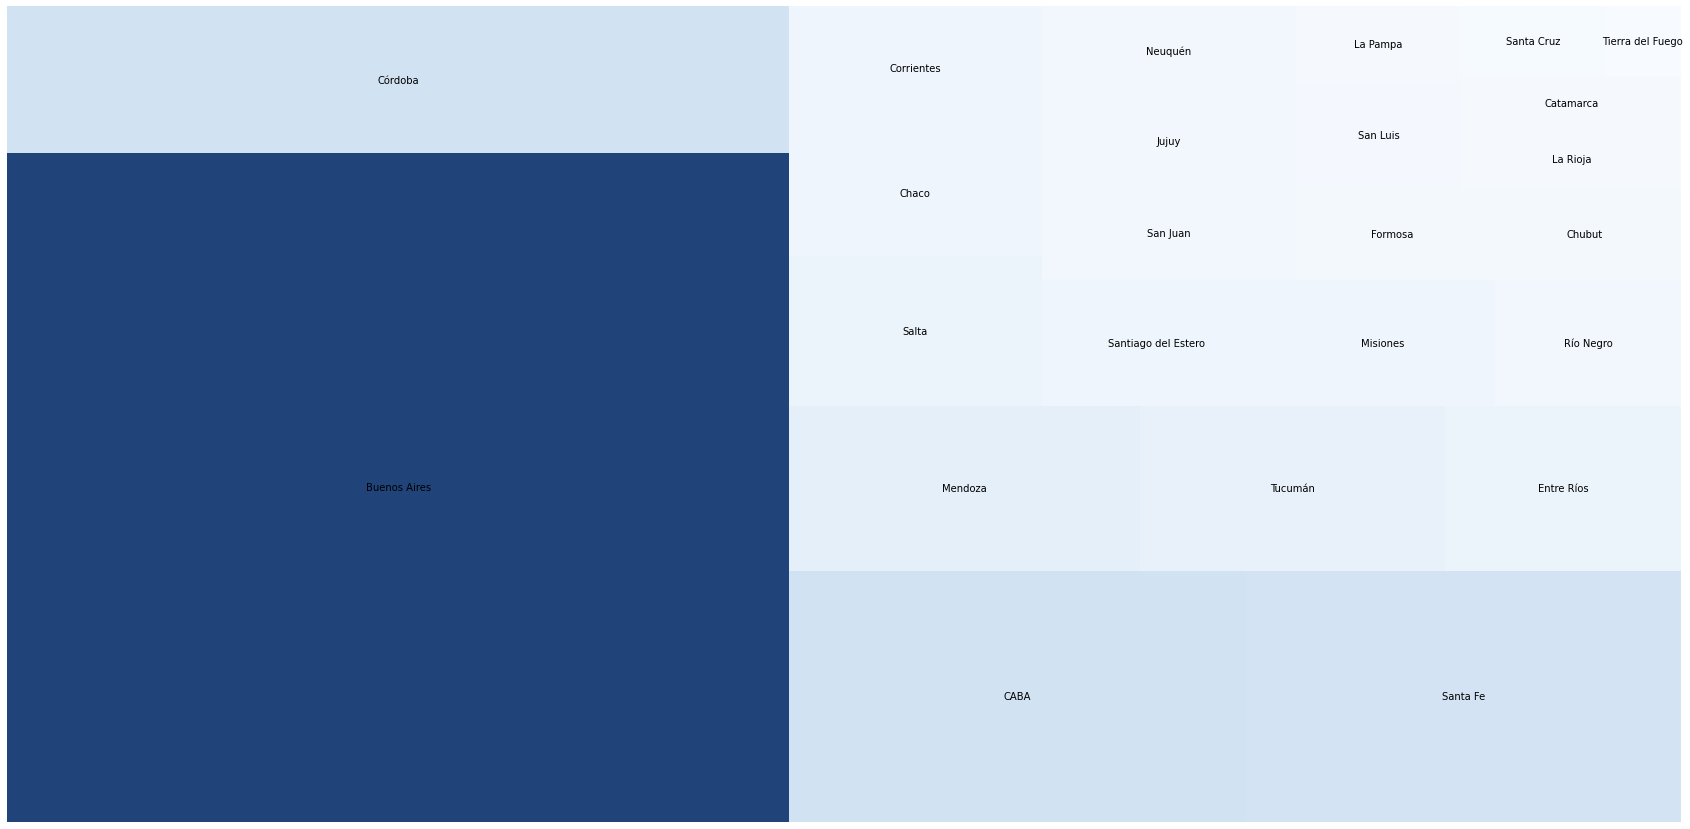

In [261]:

rqst = requests.get("http://localhost:8000/datos/provincias/alldosis")
data = rqst.json()
df = pd.DataFrame(data)

norm = mat.colors.Normalize(vmin=min(df['todas_las_dosis'].values.flatten()), vmax=max(df['todas_las_dosis'].values.flatten()))
colors = [mat.cm.Blues(norm(value)) for value in df['todas_las_dosis'].values.flatten()]

f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)

squarify.plot(sizes=df['todas_las_dosis'].values.flatten(), label=df['jurisdiccion_nombre'].values.flatten(), color=colors, alpha=.9 )
plt.axis('off')
plt.show()





